In [1]:
#paquetería...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [2]:
np.random.seed(42)

In [3]:
#daterio...

path = 'C:/Users/Flavio/Downloads/'

player_df = pd.read_csv(path + 'Advertiser.csv', index_col = 'Advertiser', encoding = 'ISO-8859-1')

print("Shape 'Advertiser' = {}".format(player_df.shape))

# Copy Dataframe
player2_df = player_df.copy(deep = False)


Shape 'Advertiser' = (366, 13)


In [4]:
player2_df.fillna(0, inplace = True)
player2_df.head()

,Alfil,Cadena3,CanalC,CBA24n,ComercioyJusticia,CarlosPaz,ElDoceTV,Gamba,InfoNegocios,LV16,PuntoaPunto,TelefeCordoba,ViaPaisCordoba
Advertiser,,,,,,,,,,,,,
123 Seguros,0.0,17.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0
365Scores,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48 Hour Film Project,0.0,0.0,0.0,0.0,0.0,0.0,0.0,429.0,0.0,0.0,0.0,0.0,0.0
4NET,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ABC Rent a Car,0.0,0.0,0.0,0.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
player2_df.dtypes

Alfil                float64
Cadena3              float64
CanalC               float64
CBA24n               float64
ComercioyJusticia    float64
CarlosPaz            float64
ElDoceTV             float64
Gamba                float64
InfoNegocios         float64
LV16                 float64
PuntoaPunto          float64
TelefeCordoba        float64
ViaPaisCordoba       float64
dtype: object

In [6]:
#

X = player2_df.copy()
z = linkage(X, 'ward')


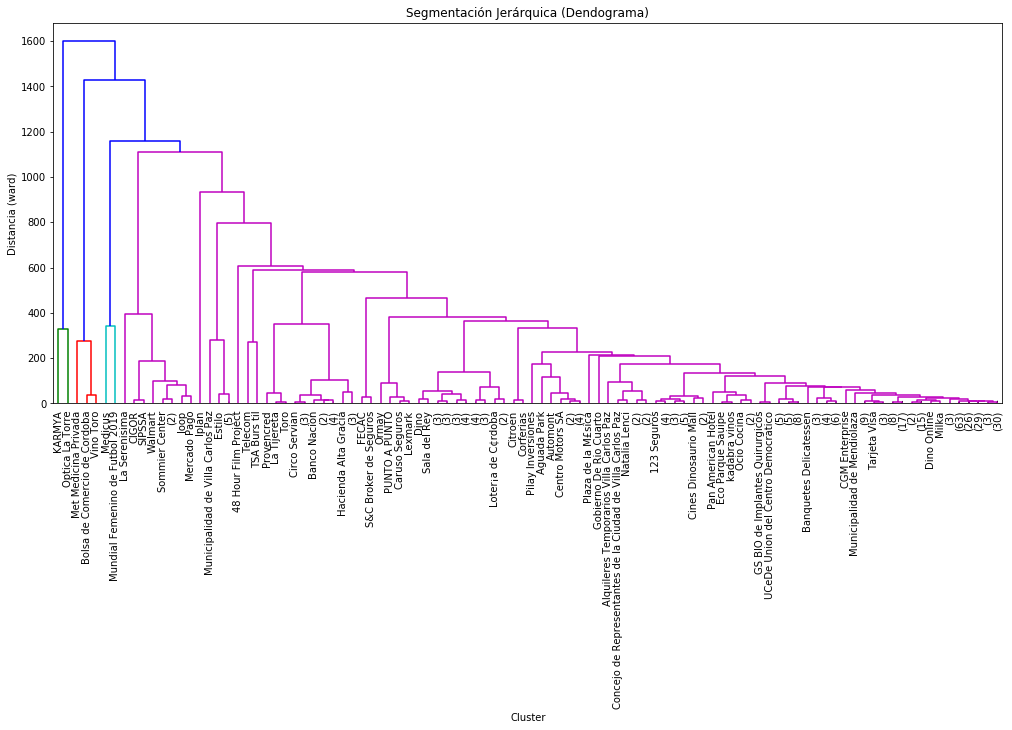

In [7]:
#clusterizamos...

plt.figure(figsize = (17, 7))

dendro = dendrogram(z, truncate_mode = 'lastp', p = 100, labels = X.index,
                    leaf_rotation = 90, leaf_font_size = 10, show_contracted = True)

plt.title('Segmentación Jerárquica (Dendograma)')
plt.xlabel('Cluster')
plt.ylabel('Distancia (ward)')

#plt.axhline(y=6000)
#plt.axhline(y=10000)

plt.show()

In [8]:
#cantidad de clusters...

k = 10

cluster = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
cluster.fit(X)
cluster.labels_


array([0, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 9, 0, 4, 1, 0,
       0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
#bucle...

clusterS = pd.Series(data = cluster.labels_, index = X.index).sort_values()

for bucle in range(0, k):
    quecluster = 'cluster' + str(bucle)
    quecluster = clusterS.where(clusterS == bucle).dropna().index
    print('cluster' + str(bucle)+': ', quecluster.values)
    print()


cluster0:  ['123 Seguros' 'Natalia Sayas' 'Natalia Lenci' 'Naldo'
 'Municipalidad de Mendiolaza' 'Muama Enence' 'MSN' 'MSC Cruzeiros'
 'MSC Cruises' 'MovyPark' 'Motomel' 'Moov Now' 'Moon Palace' 'Momondo'
 'Mini' 'Mimo & Co' 'Milkaut' 'Milka' 'Natural Botanics' 'MetroGAS'
 'Netflix' 'Newchic' 'Pilay Inversiones' 'Pico Dulce' 'Phantom'
 'Pewen Pisos' 'Peluqueria New Sport Line' 'PCD Pymes Cordoba'
 'Patagonia Flooring Cordoba' 'Patagonia Flooring & Decks'
 'Pan American Hotel' 'Packangraf' 'Ormay' 'Orfeo Suites Hotel' 'OnlineCV'
 'Omint' 'Ocio Cocina' 'No hay dos sin Tres' 'Nico Stoper' 'Netshoes'
 'Pirelli' 'M\x82rit San Telmo Hotel' 'Megatone' 'Just Fashion Now'
 'Jumbo' 'Juleriaque' 'JetSmart' 'JELUZ' 'Yakka Indumentaria Deportiva'
 'IRAM' 'INYM - INSTITUTO NACIONAL DE LA YERBA MATE' 'Investment Academy'
 'Indian Peaks Arts' 'ID ZONE' 'Iberostar Hotel' 'Iberostar' 'Hoy Lila'
 'Hoteles IHG' 'Hotel Real InterContinental' 'Hitachi' 'kadabra vinos'
 'Merit Medical' 'KLM' 'La Casa del Fit